### Stroop Task


#### Question 1
**Independed Variables**
* Two different conditions – 
 * **Congruent**
 * **Incongruent**

**Dependent Variables**
* Time taken to say out loud the color of the ink in which the word is printed for each condition

#### Question 2
__Hypothesis__
* **Null Hypothesis $ H_0 $:**
  There is no difference in time for both conditions. 
  $ i.e. \mu_c = \mu_i $ where $ \mu_c $ and $ \mu_i $ are means of **congruence** and **incongruence** conditions respectively
* **Alternative Hypothesis $ H_a $:**
  They are significantly different $ i.e. \mu_i \ne \mu_c $

* **Type of Test:** _Dependent sample t-test_
* **Justification for the Test:** Dependent sample t-test is chosen because:
 * Sample size is less than 30
 * Population standard deviation is unknown
 * It is assumed that the underlying distribution is Gaussian
 * There is a categorical variable with only two groups – congruence and incongruence condtion
 * Same participants are tested more than once


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pylab, pyplot
%pylab inline
from IPython.display import display
from IPython.display import display_markdown

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("stroopdata.csv")
display(data.head(3))

data_mean = data.mean()
data_std = data.std()
N = data.Congruent.size
mu_c = data_mean["Congruent"]
mu_i = data_mean["Incongruent"]
s_c = data_std["Congruent"]
s_i = data_std["Incongruent"]
display_markdown('**Sample mean**', raw=True)
display_markdown(("$\\mu_c = %0.2f$, $\\mu_i = %0.02f$" % (mu_c, mu_i)), raw=True)
display_markdown("**Sample std**", raw=True)
display_markdown(("$S_c = %0.2f$, $S_i = %0.02f$" % (s_c, s_i)), raw=True)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214


**Sample mean**

$\mu_c = 14.05$, $\mu_i = 22.02$

**Sample std**

$S_c = 3.56$, $S_i = 4.80$

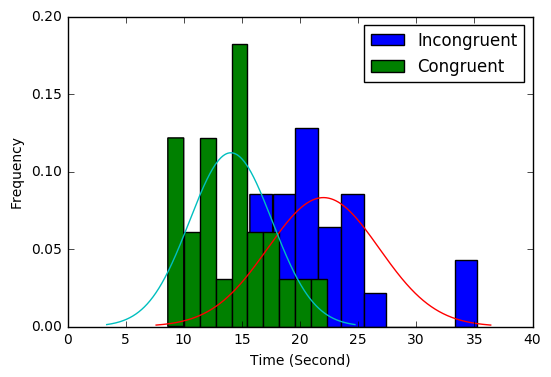

In [3]:
incong_samples = np.arange(mu_i - 3 * s_i, mu_i + 3 * s_i, 0.01)
cong_samples = np.arange(mu_c - 3 * s_c, mu_c + 3 * s_c, 0.01)
data.Incongruent.plot(kind="hist", normed=True, legend=True)
data.Congruent.plot(kind="hist", normed=True, legend=True)
pylab.plot(incong_samples, stats.norm.pdf(incong_samples, mu_i, s_i))
pylab.plot(cong_samples, stats.norm.pdf(cong_samples, mu_c, s_c))
_ = pylab.plt.xlabel("Time (Second)")

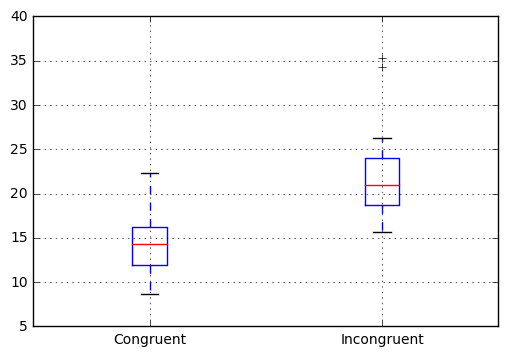

In [4]:
_ = data.boxplot()

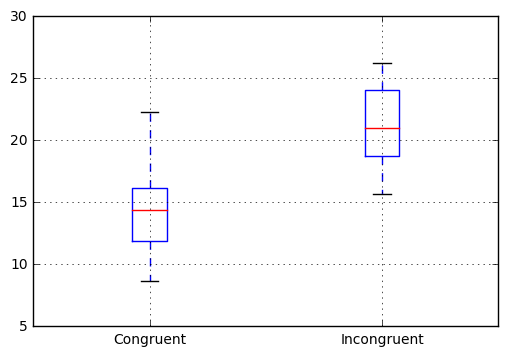

In [5]:
_ = data.boxplot(showfliers=False)

** Observation **
* From the box plots it is clear that for congruent case about $ 50\% $ of the data points lie between $ 12 $ and $ 16 $ but for the other case they lie between $ 18 $ and $ 24 $. 

* There are few outliers in incongruence data set 

---
__Dependent sample t-test__
---

In [6]:
# manual calculation
delta = data.Congruent - data.Incongruent
x_d = delta.mean()
var = delta.var()
se = np.sqrt(var/delta.size)

t = x_d / se

display_markdown("**$ t-statistics=%0.2f $**" % t, raw=True)

**$ t-statistics=-8.02 $**

### Decision
Since $ t-critical = -2.807 $ for two-tailed $ \alpha < 0.01 $ with degree of freedom $ 23 $ is greater than $ t-statistics $, $ H_0 $ is rejected and there is a significant difference between congruent and incongruent conditions

In [7]:
# with scipy
(t, p_val) = stats.ttest_rel(data.Incongruent, data.Congruent)
display_markdown("$ t{-}statistics=%0.2f $" % (t), raw=True)
display_markdown("$ p{-}value=%0.2E $" % (p_val), raw=True)

$ t{-}statistics=8.02 $

$ p{-}value=4.10E-08 $

** Question 6 **

It could be interesting to see that what happened if participants are unfamiliar with the language and they are exposed to same experiment. Intuitively, since participant could not start recognizing words before the colors in which a word is printed. There should not be difference in Congruent, and Incongruent cases.